In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
#data.head()

In [4]:
#data.tail()

In [5]:
#data = data.dropna(axis=0)
#data = data.dropna(axis=1)
#data

In [6]:
#data['SalePrice']

In [7]:
def clean(data):
    categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object' and c!='SalePrice']
    numerical_columns   = [c for c in data.columns if (data[c].dtype.name != 'object' and c != 'SalePrice')]
    answer_column = [c for c in data.columns if c == 'SalePrice']

    data = data.fillna(data.median(axis=0), axis=0)
    data_describe = data.describe(include=[object])
    for c in categorical_columns:                   
        data[c] = data[c].fillna(data_describe[c]['top'])

    data_describe = data.describe(include=[object])
    binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
    nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

    for c in binary_columns:
        top = data_describe[c]['top']
        top_items = data[c] == top
        data.loc[top_items, c] = 0
        data.loc[np.logical_not(top_items), c] = 1
    data_nonbinary = pd.get_dummies(data[nonbinary_columns])

    data_numerical = data[numerical_columns]
    data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
    data_answer = data[answer_column]

    data = pd.concat((data_numerical, data[binary_columns], data_nonbinary, data_answer), axis=1)
    data = pd.DataFrame(data, dtype=float)
    return data

In [8]:
data=clean(data)
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.165692,-0.025899,-0.128187,-0.043861,-0.011783,-0.013748,-0.009535,-0.081539,0.162205,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912,0.386420


In [9]:
data.corr()['SalePrice'].abs().sort_values(ascending=False)


SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
ExterQual_TA            0.589044
FullBath                0.560664
BsmtQual_Ex             0.553105
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
KitchenQual_TA          0.519298
GarageFinish_Unf        0.513906
YearRemodAdd            0.507101
KitchenQual_Ex          0.504094
BsmtQual_TA             0.498545
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
ExterQual_Gd            0.452466
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
MasVnrType_None         0.367456
SaleType_New            0.357509
          

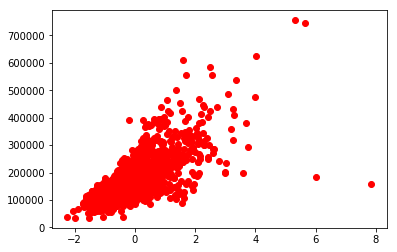

In [10]:
plt.plot(data['GrLivArea'], data['SalePrice'], 'ro')

In [11]:
p= dict(data.corr()['SalePrice'].abs().sort_values(ascending=False))
params = list((x) for x,y in p.items() if y >=0.5)
print(params)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_TA', 'GarageFinish_Unf', 'YearRemodAdd', 'KitchenQual_Ex']


In [12]:
data=data[params]

In [13]:
x = data.drop(('SalePrice'), axis=1)
y = data['SalePrice']  
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.5, random_state = 1)

regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x_train, y_train)
y_valid_predict = regr.predict(x_valid)

print('Coefficients: \n', regr.coef_)
print("MAE: %.2f" % mean_absolute_error(y_valid, y_valid_predict))
print('Variance score: %.2f' % r2_score(y_valid, y_valid_predict))

Coefficients: 
 [18700.94299648 25353.06830603  5330.53420655  4124.78714672
 12432.15282783  2348.38325916   -56.89984304 -1184.30114653
 24080.86863822   934.00550964  5047.90484438 -4262.07780468
 -2876.44092578  5656.52406866 48298.06549556]
MAE: 21593.04
Variance score: 0.79


In [14]:
x_test = pd.read_csv('./test.csv')
y_test = pd.read_csv('./sample_submission.csv')
x_test = clean(x_test)
del params[0]
x_test = x_test[params]
y_test = y_test['SalePrice']

In [15]:
y_test_predict = regr.predict(x_test)
print('Coefficients: \n', regr.coef_)
print("MAE: %.2f" % mean_absolute_error(y_test, y_test_predict))
print('Variance score: %.2f' % r2_score(y_test, y_test_predict))

Coefficients: 
 [18700.94299648 25353.06830603  5330.53420655  4124.78714672
 12432.15282783  2348.38325916   -56.89984304 -1184.30114653
 24080.86863822   934.00550964  5047.90484438 -4262.07780468
 -2876.44092578  5656.52406866 48298.06549556]
MAE: 53683.24
Variance score: -17.20
